In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load Datasets
df = pd.read_csv("/content/Churn_Modelling.csv")

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.shape

(10000, 14)

Perform EDA:

In [7]:
# Target distribution
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


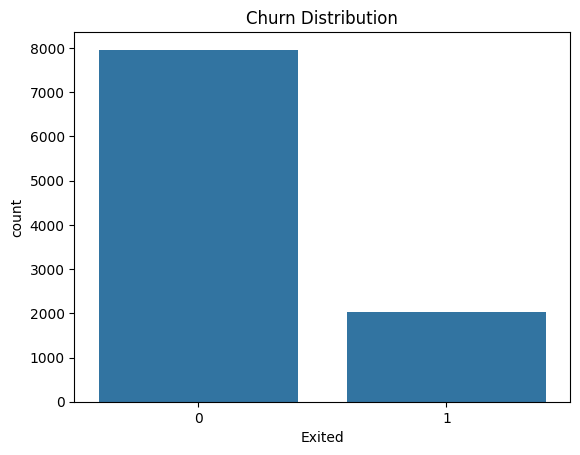

In [8]:
sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution')
plt.show()

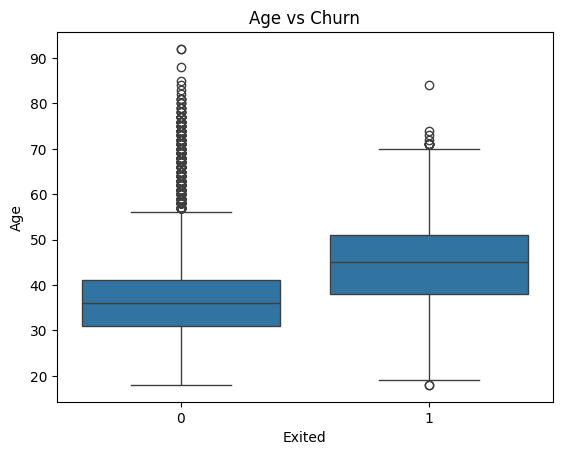

In [9]:
# Age wise churn
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Age vs Churn')
plt.show()

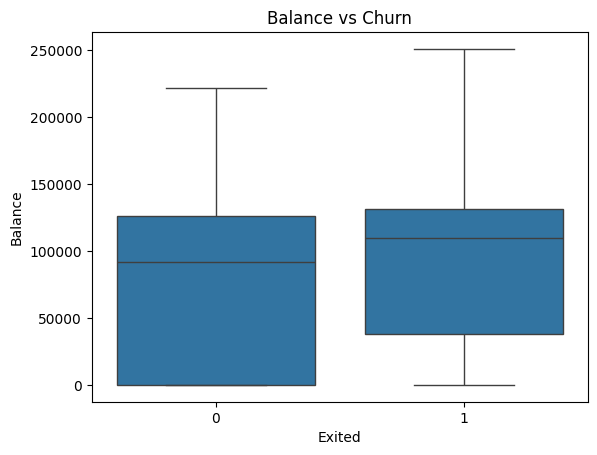

In [10]:
# Balance wise churn
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance vs Churn')
plt.show()

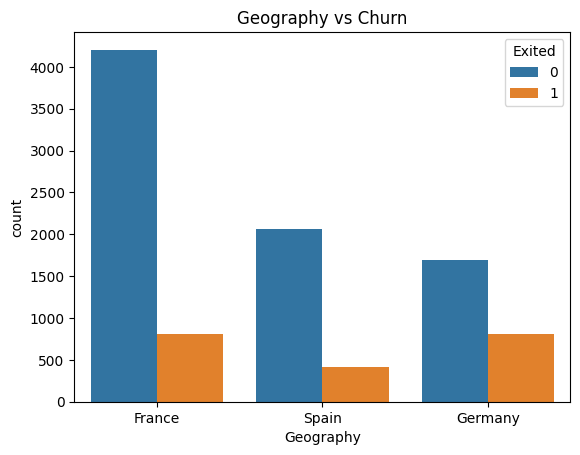

In [11]:
#Geography wise churn
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Geography vs Churn')
plt.show()

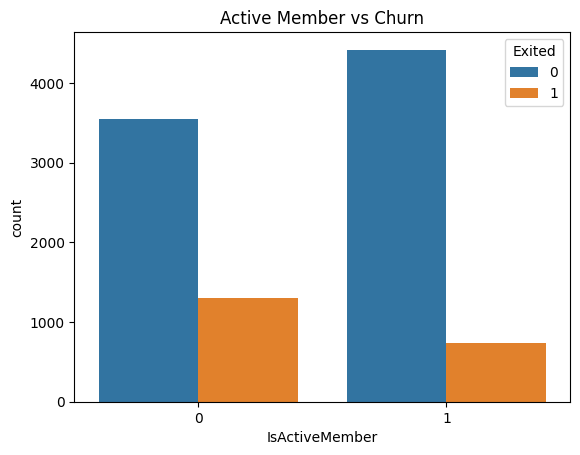

In [18]:
#Active Members wise churn
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('Active Member vs Churn')
plt.show()

In [22]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)

In [25]:
#Encode Categorical Variables
df = pd.get_dummies(df, drop_first=True)

In [27]:
#Split Features & Target
X = df.drop('Exited', axis=1)
y = df['Exited']

In [28]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
#Feature Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression Model

In [30]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [31]:
#Predictions & Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.811

Confusion Matrix:
 [[1543   64]
 [ 314   79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [33]:
#Feature Importance
#Positive coefficient → increases churn
#Negative coefficient → reduces churn

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance

,Feature,Coefficient
1,Age,0.754217
8,Geography_Germany,0.337190
3,Balance,0.161139
9,Geography_Spain,0.038960
7,EstimatedSalary,0.015744
5,HasCrCard,-0.010236
2,Tenure,-0.042637
4,NumOfProducts,-0.060278
0,CreditScore,-0.067683
10,Gender_Male,-0.264718


# Conclusion of Bank Customer Churn Prediction

In this project, I analyzed a bank customer dataset to understand the factors driving customer churn. Through Exploratory Data Analysis (EDA), I found that older customers, inactive members, customers from Germany, and those with higher account balances are more likely to churn.

After preprocessing the data, I built a Logistic Regression model to predict customer churn, achieving ~81% accuracy. The model highlighted age and inactivity as the strongest contributors to churn, while active membership and higher credit scores helped reduce churn risk.

This project demonstrates how data-driven insights and machine learning can support banks in improving customer retention strategies.